In [193]:
import numpy as np
import matplotlib.pyplot as plt
import timeit

# Task 1

In [194]:
def polylogplot(alpha, n):
    # The powers we want from 0 to n
    pows = np.linspace(0,n,n+1)
    # Multiply the powers by log 2 so that taking the exp gives 2^n
    x = np.log(2)*pows
    x = np.exp(x)
    # x^alpha
    pts = np.power(x,alpha)
    # full expression
    pts = pts*np.log(x)
    # print(pts)
    
    # plotting
    plt.rcParams['text.usetex'] = True
    plt.rcParams.update({'font.size': 22})

    plt.figure(figsize=(12, 8))

    plt.loglog(x, pts, "-k", label=r"$x^{{{}}}\log (x)$".format(alpha), markersize=5, markerfacecolor=(0, 0.447, 0.741, 1))
    
    plt.legend(loc="upper left")
    
    plt.xlabel(r"$x$")
    plt.ylabel(r"$f(x)$")

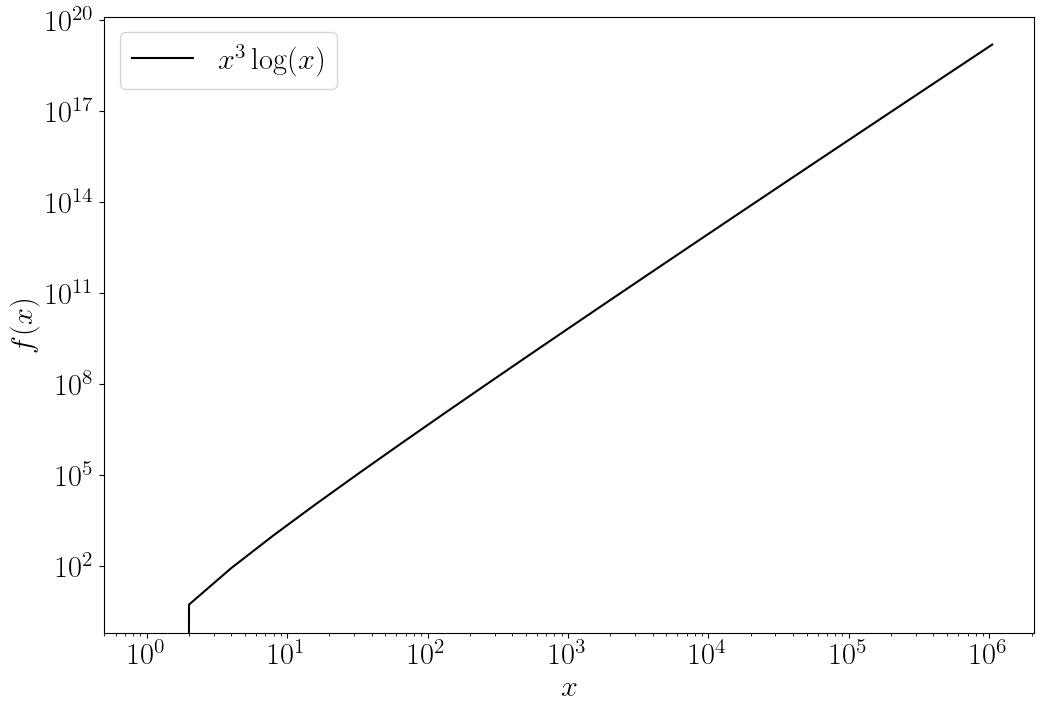

In [195]:
polylogplot(3,20)

# Task 2

In [196]:
def IterFib(n): # Iterative Fibonacci Computer
    x = 0;
    y = 1;
    for i in range(n):
        temp = y
        y = x + y
        x = temp
        # print(x)
    return x
    

In [197]:
def RecurFib(n,s): # Recursive Fibonacci Computer
    if n>2:
        x = RecurFib(n-1,s) + RecurFib(n-2,s)
    else:
        x = s
        
    return x

In [198]:
Fibdata = np.zeros((25,2))
for k in range(25):
    
    ind = np.power(1.3,k).astype(int)
    Fibdata[k,0] = IterFib(ind)
    Fibdata[k,1] = IterFib(ind-1)
    # print(k)
    

In [199]:
print(Fibdata)

[[1.00000000e+000 0.00000000e+000]
 [1.00000000e+000 0.00000000e+000]
 [1.00000000e+000 0.00000000e+000]
 [1.00000000e+000 1.00000000e+000]
 [1.00000000e+000 1.00000000e+000]
 [2.00000000e+000 1.00000000e+000]
 [3.00000000e+000 2.00000000e+000]
 [8.00000000e+000 5.00000000e+000]
 [2.10000000e+001 1.30000000e+001]
 [5.50000000e+001 3.40000000e+001]
 [2.33000000e+002 1.44000000e+002]
 [1.59700000e+003 9.87000000e+002]
 [2.86570000e+004 1.77110000e+004]
 [8.32040000e+005 5.14229000e+005]
 [6.32459860e+007 3.90881690e+007]
 [2.03650111e+010 1.25862690e+010]
 [2.77778900e+013 1.71676802e+013]
 [4.20196141e+017 2.59695497e+017]
 [1.14059301e+023 7.04925248e+022]
 [1.45448911e+030 8.98923707e+029]
 [2.28121724e+039 1.40986979e+039]
 [1.86406967e+051 1.15205841e+051]
 [5.43935643e+066 3.36170715e+066]
 [6.28580613e+086 3.88484183e+086]
 [8.35249094e+112 5.16212329e+112]]


In [200]:
def MemoFib(n): # !! DOESNT WORK !!
    
    res = 1
    k = 0
    while k<25 and res>0:
        k=k+1
        res = n - np.power(1.3,k).astype(int)
        # print(k)
        # print(res, k)
    k=k-1
    # print(k)
        
    s = Fibdata[k-1,1]
    s0 = Fibdata[k-1,0]
    # print(s)
        
#     if n>2^k:
#         x = RecurFib(n-1,s) + RecurFib(n-2,s)
#     else:
#         x = Fibdata[k]
    # print(n-np.power(1.3,k).astype(int))
    
    for l in range(n-np.power(1.3,k).astype(int)+1):
        # print(s,s0)
        temp = s
        s = s + s0
        s0 = temp
        
    
    
    return s
        

In [201]:
n = 30
print(IterFib(n))
# print(RecurFib(n,1))
print(MemoFib(n))

832040
67095.0


# Task 3

In [202]:
def MMStsn(A, B): # Strassen Multiplication Algorithm
    
    # Initialise C = A@B
    C = np.zeros((len(A), len(A)))
    
    if len(A)>1:
        
        # Break up matrix
        A11 = A[:len(A)//2, :len(A)//2]
        A21 = A[len(A)//2:, :len(A)//2]
        A12 = A[:len(A)//2, len(A)//2:]
        A22 = A[len(A)//2:, len(A)//2:]
        B11 = B[:len(B)//2, :len(B)//2]
        B21 = B[len(B)//2:, :len(B)//2]
        B12 = B[:len(B)//2, len(B)//2:]
        B22 = B[len(B)//2:, len(B)//2:]
        # print(A11, A22, B11, B22)
        # print(A12)
        
        # Compute Ms
        M1 = MMStsn((A11 + A22), (B11 + B22))
        M2 = MMStsn((A21 + A22), B11)
        M3 = MMStsn(A11, (B12 - B22))
        M4 = MMStsn(A22, (B21 - B11))
        M5 = MMStsn((A11 + A12), B22)
        M6 = MMStsn((A21 - A11), (B11 + B12))
        M7 = MMStsn((A12 - A22), (B21 + B22))
        # print(M1)

        C11 = M1 + M4 - M5 + M7
        C12 = M3 + M5
        C21 = M2 + M4
        C22 = M1 - M2 + M3 + M6
        
        # print(C)

        C[0:len(C)//2, 0:len(C)//2] = C11
        C[len(C)//2:, 0:len(C)//2] = C12
        C[0:len(C)//2, len(C)//2:] = C21
        C[len(C)//2:, len(C)//2:] = C22

    else:
        # print (A,B)
        C = A[0][0]*B[0][0]

    return C


        

In [203]:
# np.random.seed(19)

# Generate random matrices
A = np.random.randint(10, size=(np.power(2,3),np.power(2,3)))
B = np.random.randint(10, size=(np.power(2,3),np.power(2,3)))

# print (A, B)

MMStsn(A, B) 

array([[114., 229., 147., 240., 224., 266., 156., 145.],
       [ 99., 194., 158., 238., 175., 252., 111., 155.],
       [ 94., 215., 179., 248., 218., 258., 144., 172.],
       [ 67., 159., 168., 197., 206., 202., 159., 163.],
       [ 94., 213., 168., 262., 201., 256., 181., 180.],
       [ 56.,  69.,  81., 141., 130., 130.,  93., 112.],
       [ 56., 115., 114., 180., 157., 158., 117., 151.],
       [ 56., 103., 112., 150., 147., 151., 104., 107.]])

In [204]:
# Compare to inbuilt multiplication
A@B

array([[114,  99,  94,  67,  94,  56,  56,  56],
       [229, 194, 215, 159, 213,  69, 115, 103],
       [147, 158, 179, 168, 168,  81, 114, 112],
       [240, 238, 248, 197, 262, 141, 180, 150],
       [224, 175, 218, 206, 201, 130, 157, 147],
       [266, 252, 258, 202, 256, 130, 158, 151],
       [156, 111, 144, 159, 181,  93, 117, 104],
       [145, 155, 172, 163, 180, 112, 151, 107]])

In [205]:
# function that computes the standard matrix-matrix multiplication
def MMStd(A, B):
    # Detect matrix size
    n = len(A)
    nSize = (n, n)
    # Initialise result matrix
    C = np.zeros(nSize)
    
    # Loop through the matrix elements
    for i in range(n):
        for j in range(n):     
            for k in range(n): 
                # Use standard multiplication formula
                C[i][j] += A[i][k]*B[k][j]
    return C

In [208]:
# Initialise runtimes
runtimes = np.zeros((2,10))

# Compute runtimes and save for each method
for n in range(10):
    A = np.random.randint(10, size=(np.power(2,n),np.power(2,n)))
    B = np.random.randint(10, size=(np.power(2,n),np.power(2,n)))
    
    starttime = timeit.default_timer()
    CStd = MMStd(A, B)
    runtimes[0,n] = timeit.default_timer() - starttime
    starttime = timeit.default_timer()
    CStsn = MMStsn(A, B)
    runtimes[1,n] = timeit.default_timer() - starttime
    
    # See how many we've completed
    print(n)
    
# print(runtimes)


0
1
2
3
4
5
6
7
8
9


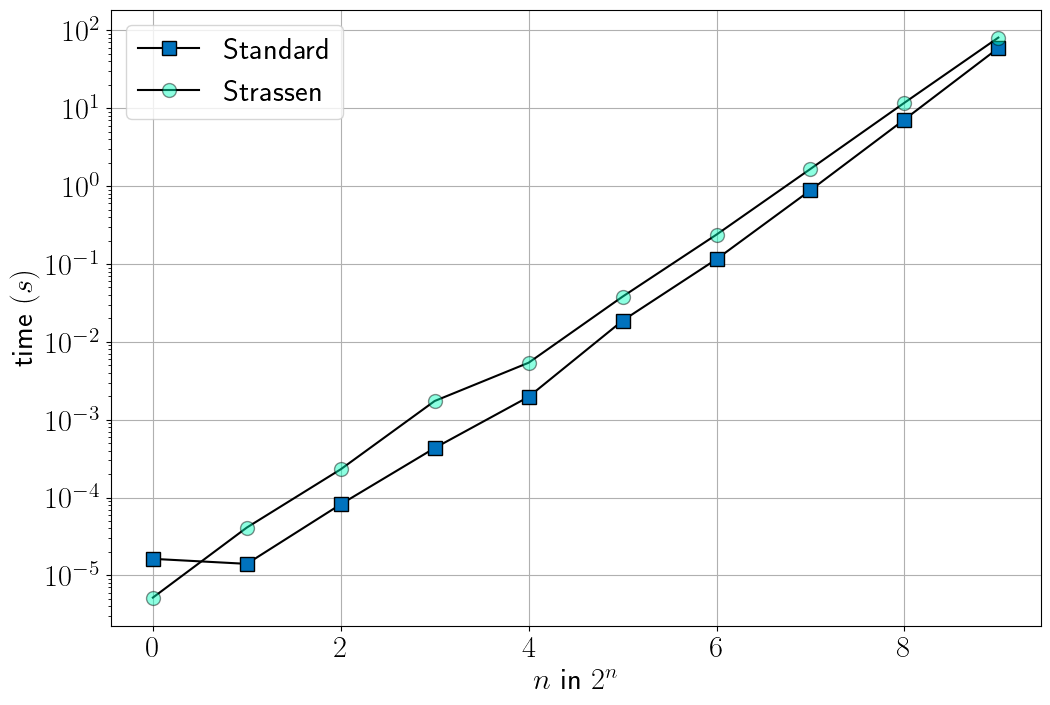

In [210]:
# Plot

plt.rcParams.update({'font.size': 22})

plt.figure(figsize=(12, 8))

plt.semilogy(runtimes[0,:], "-ks", label=r"Standard", markersize=10, markerfacecolor=(0, 0.447, 0.741, 1))
plt.semilogy(runtimes[1,:], "-ko", label=r"Strassen", markersize=10, markerfacecolor=(0, 1, 0.741, 0.447))

plt.legend(loc="upper left")

plt.xlabel(r"$n$ in $2^n$")
plt.ylabel(r"time $(s)$")
plt.grid()

# Task 4

**Computational complexity for the standard divide and conquer matrix multiplication**

The relation to solve is given by

$$F(n) = 8F\left( \frac{n}{2}\right) + 4\left(\frac{n}{2}\right)^2, \ \ \ F(1) = 1 .$$ 

We begin by making the substitutions

$$n=2^p, \ \ a_p = F\left(2^p\right) .$$

This gives us a linear problem, 

$$a_p=8a_{p-1}+4^p, \ \ \ a_0 = 1$$

with homogeneous solution 

$$a_{p,h} = A8^p$$ 

for some constant $A$. For the particular solution we try 

$$a_{p,s} = B4^p$$

for some constant $B$. Plugging this in we get 

$$B4^p - 8B4^{p-1} = 4^p$$ 

which similifies to give

$$B = -1 .$$

The general solution then is 

$$a_p = A8^p - 4^p .$$ 

Using our initial condition we get that 

$$1 = A - 1$$ 

giving $A=2$. Thus the solution to our adjusted problem is

$$a_p = 2\cdot 8^p - 4^p = 2\left(2^p\right)^3 - \left(2^p\right)^2$$ 

and so the complexity is given by

$$F\left(n\right) = 2n^3 - n^2 = n^2\left(2n-1\right)$$ 

as expected.

**Computational complexity for the divide and conquer Strassen matrix multiplication**

The relation to solve is given by

$$F(n) = 7F\left( \frac{n}{2}\right) + 18\left(\frac{n}{2}\right)^2, \ \ \ F(1) = 1 .$$ 

We begin by making the substitutions

$$n=2^p, \ \ a_p = F\left(2^p\right) .$$

This gives us a linear problem, 

$$a_p=7a_{p-1}+\frac{9}{2}4^p, \ \ \ a_0 = 1$$

with homogeneous solution 

$$a_{p,h} = A7^p$$ 

for some constant $A$. For the particular solution we try 

$$a_{p,s} = B4^p$$

for some constant $B$. Plugging this in we get 

$$B4^p - 7B4^{p-1} = \frac{9}{2}4^p$$ 

which similifies to give

$$B = -6 .$$

The general solution then is 

$$a_p = A7^p - 6\cdot4^p .$$ 

Using our initial condition we get that 

$$1 = A - 6$$ 

giving $A=7$. Thus the solution to our adjusted problem is

$$a_p = 7\cdot 7^p - 6\cdot4^p = 7\left(2^p\right)^{\log_2 7} - 6\left(2^p\right)^2$$ 

and so the complexity is given by

$$F\left(n\right) = 7n^{\log_2 7} - 6n^2$$ 

as expected.

# Bonus Task